In [37]:
import numpy as np
import pandas as pd

In [38]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [39]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [40]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


## EDA

In [41]:
train["Response"].value_counts()

Response
0    10089739
1     1415059
Name: count, dtype: int64

In [42]:
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Note: 
+ no null
+ label: Response 
+ id: no use
+ Gender: binary 
+ Age: -> change to category
+ Driving_License: binary  
+ Region_Code: change to category
+ previous_insured: binary 
+ Vehicle_Damage: binary
+ Vehicle_Damage: category
+ Annual_Premium: numerical 
+ Policy_Sales_Channel: -> change to category
+ vintage: -> change to category

Important: 
+ this is imbalance dataset

### Binary cols

In [43]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [44]:
group_res = train.groupby('Response')

In [45]:
train.groupby('Previously_Insured')["Response"].value_counts()

Previously_Insured  Response
0                   0           4766457
                    1           1411659
1                   0           5323282
                    1              3400
Name: count, dtype: int64

In [46]:
train.groupby('Gender')["Response"].value_counts()

Gender  Response
Female  0           4731603
        1            545061
Male    0           5358136
        1            869998
Name: count, dtype: int64

In [47]:
train.groupby('Driving_License')["Response"].value_counts()

Driving_License  Response
0                0              21502
                 1               1255
1                0           10068237
                 1            1413804
Name: count, dtype: int64

In [48]:
train.groupby('Vehicle_Age')["Response"].value_counts()

Vehicle_Age  Response
1-2 Year     0           4919406
             1           1063272
< 1 Year     0           4835296
             1            208849
> 2 Years    0            335037
             1            142938
Name: count, dtype: int64

In [49]:
train.groupby('Vehicle_Damage')["Response"].value_counts()

Vehicle_Damage  Response
No              0           5697548
                1             24021
Yes             0           4392191
                1           1391038
Name: count, dtype: int64

Note: 
+ people with no insure has higher chance to respond
+ Male has slightly higher rate of response
+ people without license is not likely to respond
+ the more people ride, the more they respond
+ people with vihicle damage arre likely to respond

### Numerical cols

Age, Region_Code, Annual_Premium, Policy_Sales_Channel, Vintage


In [50]:
def plot_all_cols(data,cols):
    id_res = (data["Response"] == 1)
    id_no_res = (data["Response"] == 0)
    l = len(cols)
    plt.figure(figsize=(20,5*l))
    for i,col in enumerate(cols):
        print(col)
        plt.subplot(l,2,i*2+1)
        value,count = np.unique(data[col].loc[id_res],return_counts=True)
        plt.bar(value,count)
        plt.subplot(l,2,i*2+2)
        value,count = np.unique(data[col].loc[id_no_res],return_counts=True)
        plt.bar(value,count,color='r')
    plt.tight_layout()
        

Age
Region_Code
Policy_Sales_Channel


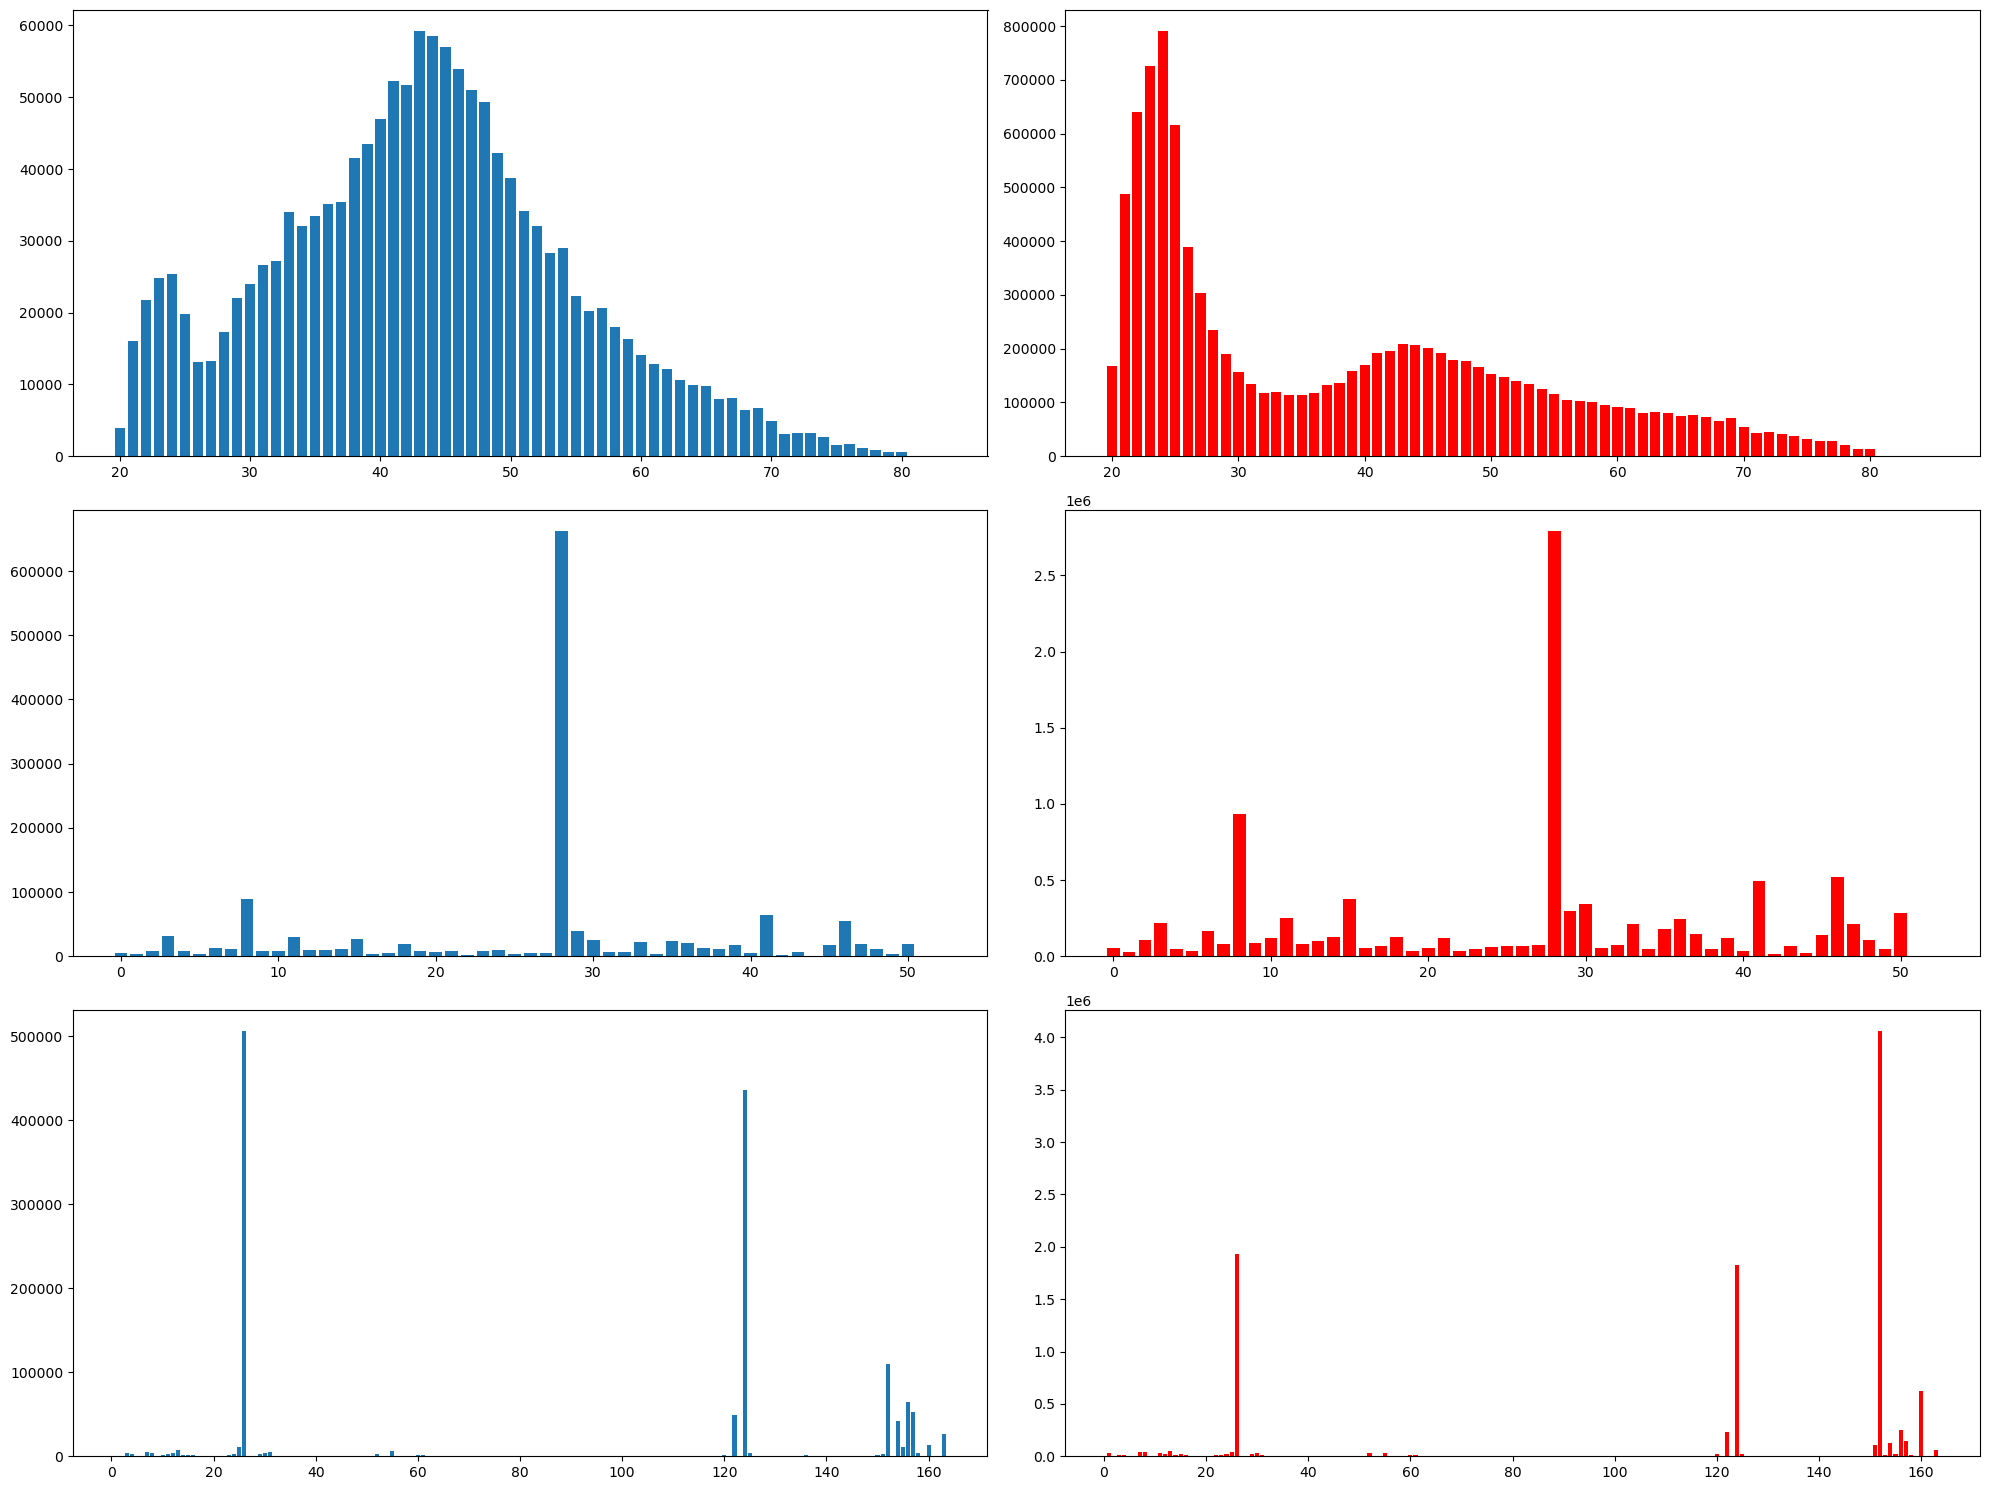

In [51]:
plot_all_cols(train,["Age","Region_Code","Policy_Sales_Channel"])

In [52]:
def cal_pct_diff(data,col):
    id_res = (data["Response"] == 1)
    id_no_res = (data["Response"] == 0)
    value_res,count_res = np.unique(data[col].loc[id_res],return_counts=True)
    value_no_res,count_no_res = np.unique(data[col].loc[id_no_res],return_counts=True)
    res = {}
    for i in range(len(value_res)):
        res[value_res[i]] = count_res[i]/count_no_res[i]
    return res

In [53]:
pct_res = (train["Response"] == 1).sum()/(train["Response"] == 0).sum()
pct_res

0.14024733444542023

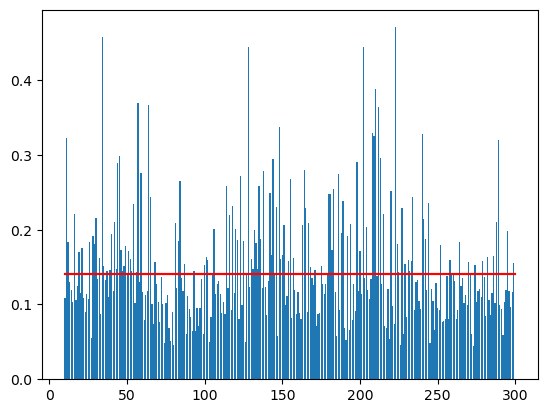

In [65]:
dict_pct = cal_pct_diff(train,"Vintage")
keys = np.array(list(dict_pct.keys()))
values = np.array(list(dict_pct.values()))
# plt.figure(figsize=(20,5))
plt.bar(keys,values)
plt.plot([10,300],[pct_res,pct_res],'r')
plt.plot([10,300],[pct_res,pct_res],'r')

In [132]:
def draw_plot_range_pct(range_pct,keys,values,pct_res=pct_res):
    plt.bar(keys,sorted(values))
    plt.plot([min(keys),max(keys)],[pct_res,pct_res],'r')
    for pct in range_pct:
        plt.plot([min(keys),max(keys)],[pct,pct],'g')

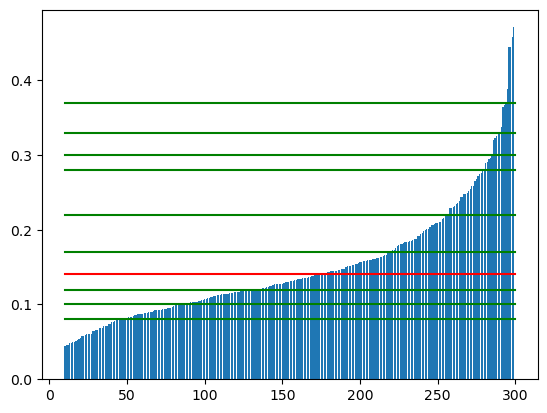

In [120]:
range_pct = [0.08,0.1,0.12,0.17,0.22,0.28,0.3,0.33,0.37]
draw_plot_range_pct(range_pct,keys,values)

In [116]:
def create_groups(df, column_name,keys,values, range_pct):    
    bins = [float('-inf')] + range_pct + [float('inf')]
    cutten_groups = []
    
    for i in range(1, len(bins)):
        idx = (values > bins[i-1]) & (values <= bins[i])
        cutten_groups.append(keys[idx])
    
    # Check if any key is missing
    total_grouped = sum(len(g) for g in cutten_groups)
    if total_grouped != len(keys):
        print(f"Warning: {len(keys) - total_grouped} keys are missing from groups")
    
    dict_cutten_groups = {}
    for idx, group in enumerate(cutten_groups):
        for value in group:
            dict_cutten_groups[value] = f'Group{idx}'
    
    new_column_name = f'{column_name}Group'
    df[new_column_name] = df[column_name].map(dict_cutten_groups).fillna('Unknown')
    
    return df

In [121]:
create_groups(train,"Vintage",keys,values,range_pct)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_log,AnnualGroup,VintageGroup
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0,11.083711,11-11.5,Group1
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1,10.983800,10.5-11,Group4
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0,10.546499,10.5-11,Group0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0,7.875119,-8,Group2
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0,10.371990,10-10.5,Group2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,Male,48,1,6.0,0,1-2 Year,Yes,27412.0,26.0,218,0,10.218773,10-10.5,Group3
11504794,11504794,Female,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115,1,10.292484,10-10.5,Group3
11504795,11504795,Female,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189,0,7.875119,-8,Group5
11504796,11504796,Female,51,1,28.0,0,1-2 Year,Yes,48443.0,26.0,274,1,10.788164,10.5-11,Group3


In [123]:
train["VintageGroup"].value_counts()

VintageGroup
Group3    2989569
Group0    1910692
Group2    1765423
Group1    1742521
Group4    1309911
Group5    1048733
Group9     229652
Group6     209052
Group7     189767
Group8     109478
Name: count, dtype: int64

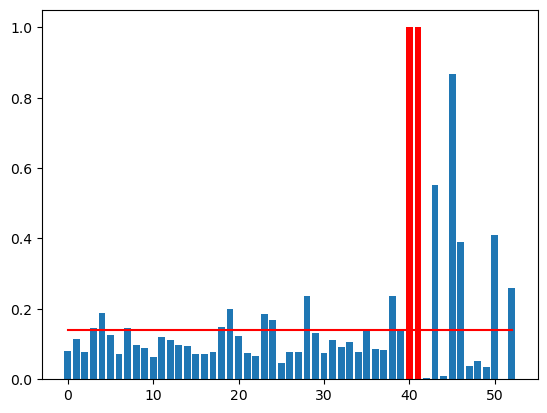

In [148]:
dict_pct = cal_pct_diff(train,"Region_Code")
keys = np.array(list(dict_pct.keys()))
values = np.array(list(dict_pct.values()))
idx = values < 0.9
plt.bar(keys[idx],values[idx])
plt.bar(keys[~idx],1,color='r')
plt.plot([0,52],[pct_res,pct_res],'r')

In [149]:
values_tmp = values.copy() 
values_tmp[~idx] = 0.9

In [157]:
range_pct = [0.04,0.07,0.11,0.2,0.26,0.42,0.6,1]

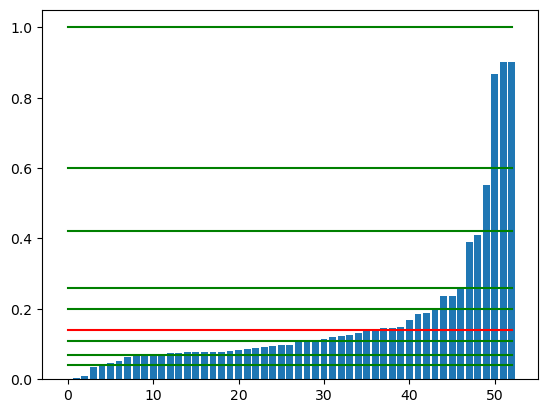

In [158]:
draw_plot_range_pct(range_pct=range_pct,keys=keys,values=values_tmp)

In [161]:
range_pct += [3]

In [162]:
create_groups(train,"Region_Code",keys,values,range_pct)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_log,AnnualGroup,VintageGroup,Region_CodeGroup
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0,11.083711,11-11.5,Group1,Group3
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1,10.983800,10.5-11,Group4,Group4
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0,10.546499,10.5-11,Group0,Group2
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0,7.875119,-8,Group2,Group3
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0,10.371990,10-10.5,Group2,Group2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,Male,48,1,6.0,0,1-2 Year,Yes,27412.0,26.0,218,0,10.218773,10-10.5,Group3,Group2
11504794,11504794,Female,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115,1,10.292484,10-10.5,Group3,Group2
11504795,11504795,Female,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189,0,7.875119,-8,Group5,Group2
11504796,11504796,Female,51,1,28.0,0,1-2 Year,Yes,48443.0,26.0,274,1,10.788164,10.5-11,Group3,Group4


In [166]:
train["Region_Code"][train["Region_CodeGroup"] == "Unknown"]

11370234    39.2
Name: Region_Code, dtype: float64

In [170]:
train["Policy_Sales_Channel"].value_counts()

Policy_Sales_Channel
152.0    4166183
26.0     2433456
124.0    2264490
160.0     640380
156.0     316693
          ...   
102.0          4
112.0          3
27.0           2
6.0            1
5.0            1
Name: count, Length: 152, dtype: int64

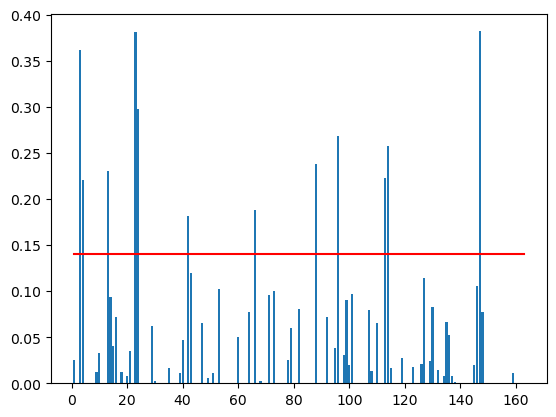

In [196]:
dict_pct = cal_pct_diff(train,"Policy_Sales_Channel")
keys = np.array(list(dict_pct.keys()))
values = np.log1p(np.array(list(dict_pct.values())))
idx = values < 0.4
# plt.bar(keys,values)
plt.bar(keys[idx],values[idx])
# plt.bar(keys[~idx],1,color='r')
plt.plot([min(keys),max(keys)],[pct_res,pct_res],'r')

In [198]:
values_tmp = values.copy() 
values_tmp[~idx] = 0.4

In [199]:
range_pct = [0.05,0.1,0.2,0.25,0.39]

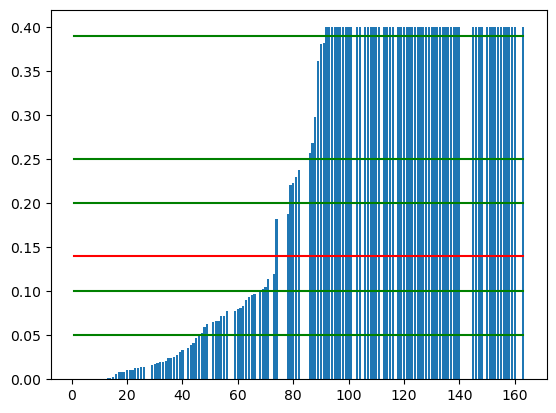

In [200]:
draw_plot_range_pct(range_pct=range_pct,keys=keys,values=values_tmp)

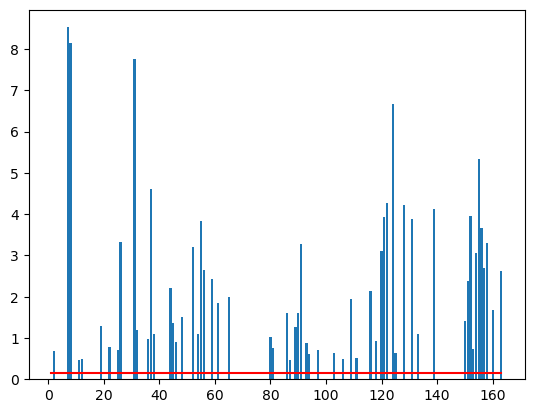

In [208]:
idx2 = values > 0.4
# plt.bar(keys,values)
plt.bar(keys[idx2],values[idx2])
# plt.bar(keys[~idx],1,color='r')
plt.plot([min(keys),max(keys)],[pct_res,pct_res],'r')

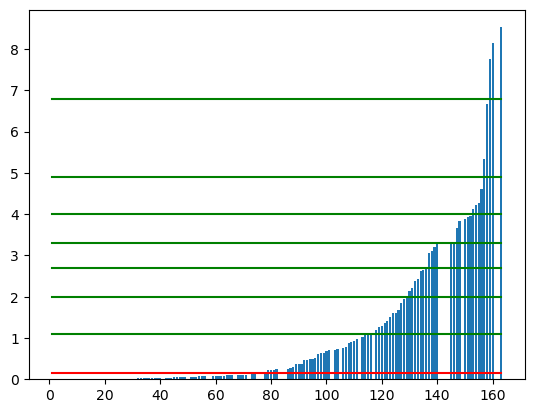

In [220]:
range_pct_2 = [1.1,2,2.7,3.3,4,4.9,6.8]
draw_plot_range_pct(range_pct=range_pct_2,keys=keys,values=values)

In [221]:
final_range_pct = range_pct + range_pct_2

In [223]:
create_groups(train,"Policy_Sales_Channel",keys,values,final_range_pct)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_log,AnnualGroup,VintageGroup,Region_CodeGroup,Policy_Sales_ChannelGroup
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0,11.083711,11-11.5,Group1,Group3,Group11
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1,10.983800,10.5-11,Group4,Group4,Group9
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0,10.546499,10.5-11,Group0,Group2,Group9
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0,7.875119,-8,Group2,Group3,Group9
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0,10.371990,10-10.5,Group2,Group2,Group9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,Male,48,1,6.0,0,1-2 Year,Yes,27412.0,26.0,218,0,10.218773,10-10.5,Group3,Group2,Group9
11504794,11504794,Female,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115,1,10.292484,10-10.5,Group3,Group2,Group9
11504795,11504795,Female,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189,0,7.875119,-8,Group5,Group2,Group9
11504796,11504796,Female,51,1,28.0,0,1-2 Year,Yes,48443.0,26.0,274,1,10.788164,10.5-11,Group3,Group4,Group9


In [224]:
train["Policy_Sales_ChannelGroup"].value_counts()

Policy_Sales_ChannelGroup
Group9     6972916
Group11    2298464
Group6      681981
Group8      426215
Group10     294160
Group7      206914
Group5      174765
Group0      133341
Group12     103817
Group1       82428
Group3       70273
Group4       53260
Group2        6011
Unknown        253
Name: count, dtype: int64

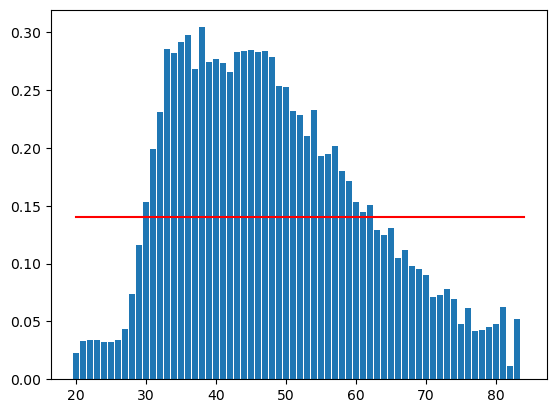

In [226]:
dict_pct = cal_pct_diff(train,"Age")
keys = np.array(list(dict_pct.keys()))
values = np.array(list(dict_pct.values()))
# plt.figure(figsize=(20,5))
plt.bar(keys,values)
plt.plot([20,84],[pct_res,pct_res],'r')

In [248]:
range_pct = [0.04,0.07,0.12,0.16,0.205,0.235,0.265,0.287]

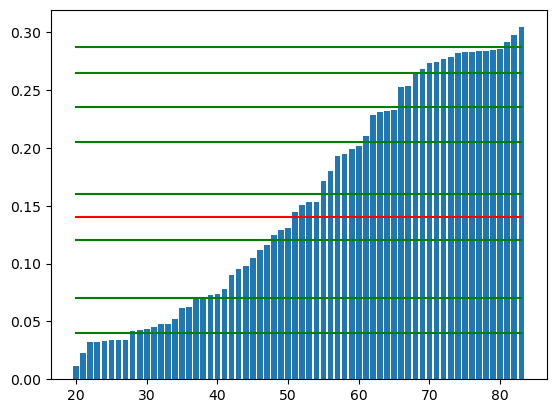

In [249]:
draw_plot_range_pct(range_pct=range_pct,keys=keys,values=values)

In [250]:
create_groups(train,"Age",keys,values,range_pct)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_log,AnnualGroup,VintageGroup,Region_CodeGroup,Policy_Sales_ChannelGroup,AgeGroup
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0,11.083711,11-11.5,Group1,Group3,Group11,Group0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1,10.983800,10.5-11,Group4,Group4,Group9,Group7
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0,10.546499,10.5-11,Group0,Group2,Group9,Group0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0,7.875119,-8,Group2,Group3,Group9,Group8
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0,10.371990,10-10.5,Group2,Group2,Group9,Group8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,Male,48,1,6.0,0,1-2 Year,Yes,27412.0,26.0,218,0,10.218773,10-10.5,Group3,Group2,Group9,Group7
11504794,11504794,Female,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115,1,10.292484,10-10.5,Group3,Group2,Group9,Group0
11504795,11504795,Female,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189,0,7.875119,-8,Group5,Group2,Group9,Group2
11504796,11504796,Female,51,1,28.0,0,1-2 Year,Yes,48443.0,26.0,274,1,10.788164,10.5-11,Group3,Group4,Group9,Group5


In [251]:
train["AgeGroup"].value_counts()

AgeGroup
Group0     3941196
Group7     2868759
Group2      976249
Group5      815854
Group4      775191
Group3      749187
Group1      498279
Group8      479233
Group6      400806
Unknown         44
Name: count, dtype: int64

In [60]:
train["Annual_log"] = train["Annual_Premium"].apply(np.log1p)
train["Annual_log"]

0           11.083711
1           10.983800
2           10.546499
3            7.875119
4           10.371990
              ...    
11504793    10.218773
11504794    10.292484
11504795     7.875119
11504796    10.788164
11504797    10.399890
Name: Annual_log, Length: 11504798, dtype: float64

In [61]:
train["Annual_log"].describe()

count    1.150480e+07
mean     9.997924e+00
std      1.034031e+00
min      7.875119e+00
25%      1.013769e+01
50%      1.036801e+01
75%      1.058284e+01
max      1.319963e+01
Name: Annual_log, dtype: float64

In [62]:
bins = [float('-inf'), 8.0, 8.5,9.0,9.5,10,10.5,11,11.5,12,12.5,13,float('inf')]
labels = ['-8','8-8.5','8.5-9','9-9.5','9.5-10','10-10.5','10.5-11','11-11.5','11.5-12','12-12.5','12.5-13','13+']
train.loc[:, "AnnualGroup"]= pd.cut(train["Annual_log"],bins=bins,labels=labels,right=True, include_lowest=True)

C:\Users\Phan Trong Dai\AppData\Local\Temp\ipykernel_17084\2719870989.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_age= train.groupby(['AnnualGroup', 'Response']).size().unstack(fill_value=0)


<Axes: xlabel='AnnualGroup'>

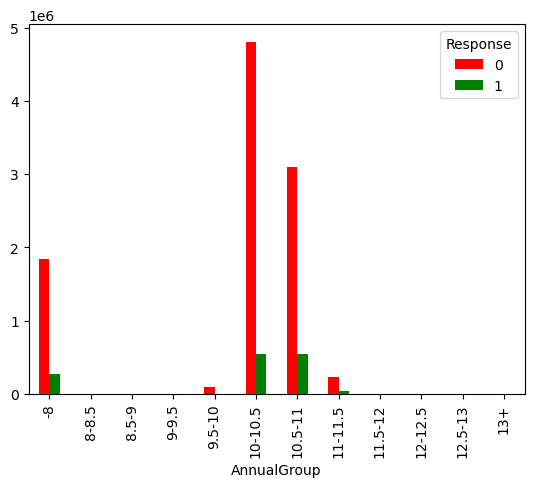

In [63]:
grouped_age= train.groupby(['AnnualGroup', 'Response']).size().unstack(fill_value=0)
grouped_age.plot(kind='bar', stacked=False, color=['red', 'green'])

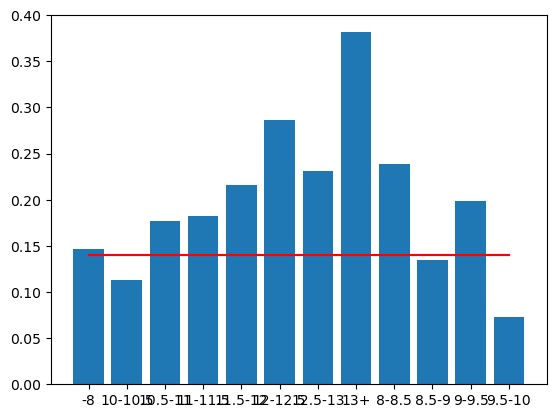

In [64]:
dict_pct = cal_pct_diff(train,"AnnualGroup")
keys = np.array(list(dict_pct.keys()))
values = np.array(list(dict_pct.values()))
# plt.figure(figsize=(20,5))
plt.bar(keys,values)
plt.plot([0,len(keys)-1],[pct_res,pct_res],'r')

In [225]:
train["AnnualGroup"].value_counts()

AnnualGroup
10-10.5    5344275
10.5-11    3652641
-8         2112610
11-11.5     283209
9.5-10      109075
11.5-12       1021
12.5-13        820
12-12.5        418
13+            268
8-8.5          228
9-9.5          157
8.5-9           76
Name: count, dtype: int64